In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("HR Employee data.csv")
df.head()

,EmployeeID,JoiningYear,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,LeavingYear,Reason,RelievingStatus,office_code,JobLevel_updated
0,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,14,4,5,3,Yes,2019.0,long hours,Voluntary,BOS,L7
1,100001,2006,52,Travel_Rarely,265,Corporate Functions,19,Doctorate,1,519,...,12,4,5,3,Yes,2018.0,medical issues,Voluntary,NYC,L6
2,100002,2006,53,Travel_Rarely,607,Corporate Functions,2,Doctorate,1,1572,...,12,3,1,4,Yes,2018.0,retiring,Voluntary,OTT,L6
3,100003,2006,54,Travel_Rarely,215,Corporate Functions,19,Diploma,1,309,...,13,4,5,3,Yes,2019.0,career change,Voluntary,NYC,L7
4,100004,2007,57,Travel_Rarely,285,Marketing,2,Diploma,1,828,...,11,5,5,3,Yes,2018.0,retiring,Voluntary,CAL,L5


In [3]:
df=df.drop(["EmployeeID", "EmployeeCount", "EmployeeNumber","StandardHours", "Over18","LeavingYear", "Reason", "RelievingStatus"], axis=1)

In [4]:
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Column: {column} ||| Unique Values: {unique_values}")

Column: JoiningYear ||| Unique Values: 17
Column: Age ||| Unique Values: 43
Column: BusinessTravel ||| Unique Values: 3
Column: DailyRate ||| Unique Values: 1391
Column: Department ||| Unique Values: 6
Column: DistanceFromHome ||| Unique Values: 29
Column: EducationField ||| Unique Values: 4
Column: EnvironmentSatisfaction ||| Unique Values: 4
Column: Gender ||| Unique Values: 2
Column: HourlyRate ||| Unique Values: 71
Column: JobInvolvement ||| Unique Values: 4
Column: JobSatisfaction ||| Unique Values: 4
Column: MaritalStatus ||| Unique Values: 3
Column: MonthlyIncome ||| Unique Values: 7257
Column: MonthlyRate ||| Unique Values: 10203
Column: NumCompaniesWorked ||| Unique Values: 10
Column: OverTime ||| Unique Values: 2
Column: PercentSalaryHike ||| Unique Values: 15
Column: PerformanceRating ||| Unique Values: 5
Column: RelationshipSatisfaction ||| Unique Values: 4
Column: StockOptionLevel ||| Unique Values: 4
Column: TotalWorkingYears ||| Unique Values: 41
Column: TrainingTimesLas

## Handle Imbalance Data

In [5]:
df['Attrition'] = df['Attrition'].map({'Yes': 0, 'No': 1})

In [6]:
X = df.drop("Attrition",axis=1)
y = df["Attrition"]

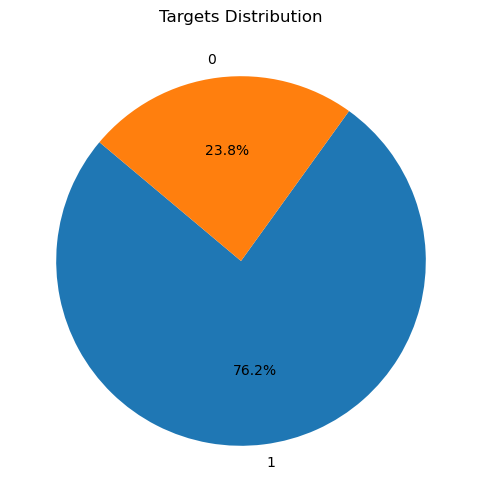

In [7]:
class_counts = df['Attrition'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Targets Distribution')
plt.show()

In [8]:
count_class_0, count_class_1 = df['Attrition'].value_counts()


df_class_0 = df[df['Attrition'] == 0]
df_class_1 = df[df['Attrition'] == 1]

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


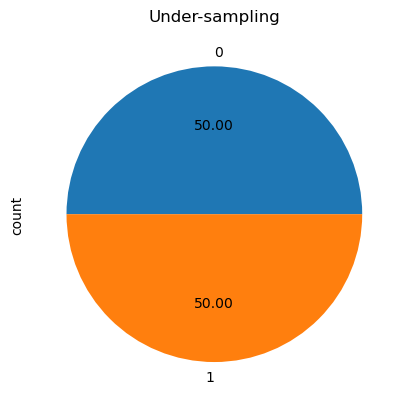

In [9]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) 

X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [10]:
df['Attrition'].count()

13423

In [11]:
y_res = df['Attrition'] 

In [12]:
df['Attrition'].count()

13423

In [13]:
df.isnull().sum()

JoiningYear                 0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
office_code                 0
JobLevel_updated            0
dtype: int64

In [14]:
df = df.dropna(subset=['Attrition'])

In [15]:
df.head()

,JoiningYear,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,office_code,JobLevel_updated
0,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,3,Male,91,...,39,2,2,14,4,5,3,0,BOS,L7
1,2006,52,Travel_Rarely,265,Corporate Functions,19,Doctorate,3,Male,76,...,33,2,2,12,4,5,3,0,NYC,L6
2,2006,53,Travel_Rarely,607,Corporate Functions,2,Doctorate,3,Female,78,...,34,4,3,12,3,1,4,0,OTT,L6
3,2006,54,Travel_Rarely,215,Corporate Functions,19,Diploma,3,Male,86,...,35,3,2,13,4,5,3,0,NYC,L7
4,2007,57,Travel_Rarely,285,Marketing,2,Diploma,3,Male,31,...,39,2,3,11,5,5,3,0,CAL,L5


In [16]:
df.isnull().sum()

JoiningYear                 0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
office_code                 0
JobLevel_updated            0
dtype: int64

### Varaibles to Call & Mapping

In [17]:
numerical_variables = ["JoiningYear", "Age", "DailyRate", "DistanceFromHome", "HourlyRate", 
                       "MonthlyIncome", "MonthlyRate", "PercentSalaryHike", "TotalWorkingYears",
                        "YearsInCurrentRole", 
                         "YearsSinceLastPromotion", "YearsWithCurrManager", "YearsAtCompany", 
                         "NumCompaniesWorked",
                       ]

categorical_variables = ["BusinessTravel", "Department", "EducationField", "EnvironmentSatisfaction", 
                         "Gender", "JobInvolvement", "JobSatisfaction", "MaritalStatus" , "OverTime", "PerformanceRating", 
                         "RelationshipSatisfaction","StockOptionLevel", 
                         "TrainingTimesLastYear", "WorkLifeBalance", "Attrition" , "office_code", 
                         "JobLevel_updated"]

dummyvar =  ["BusinessTravel", "Department", "EducationField", "EnvironmentSatisfaction", 
                         "Gender", "JobInvolvement", "JobSatisfaction", "MaritalStatus", 
                          "OverTime", "PerformanceRating", 
                         "RelationshipSatisfaction","StockOptionLevel", 
                         "TrainingTimesLastYear", "WorkLifeBalance",  "office_code", 
                         "JobLevel_updated"]

In [18]:
for var in categorical_variables:
    print(f"Unique values for {var}:")
    print(df[var].unique())
    print() 

Unique values for BusinessTravel:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Unique values for Department:
['Corporate Functions' 'Marketing' 'Delivery' 'Product' 'Sales' 'HR']

Unique values for EducationField:
['Doctorate' 'Diploma' 'Masters' 'Bachelors']

Unique values for EnvironmentSatisfaction:
[3 2 4 1]

Unique values for Gender:
['Male' 'Female']

Unique values for JobInvolvement:
[3 2 1 4]

Unique values for JobSatisfaction:
[3 2 4 1]

Unique values for MaritalStatus:
['Married' 'Divorced' 'Single']

Unique values for OverTime:
['Yes' 'No']

Unique values for PerformanceRating:
[4 3 2 5 1]

Unique values for RelationshipSatisfaction:
[3 2 4 1]

Unique values for StockOptionLevel:
[0 1 2 3]

Unique values for TrainingTimesLastYear:
[2 4 3 1 0 5 6]

Unique values for WorkLifeBalance:
[2 3 1 4]

Unique values for Attrition:
[0 1]

Unique values for office_code:
['BOS' 'NYC' 'OTT' 'CAL' 'PHL' 'MKM' 'VAN' 'TOR']

Unique values for JobLevel_updated:
['L7' 'L6' 'L5' 'L3' 'L2

In [19]:
mappings = {
    "BusinessTravel": {"Non-Travel": 0, "Travel_Rarely": 1, "Travel_Frequently": 2},
    "Department": {
        "Corporate Functions": 0,
        "Marketing": 1,
        "Delivery": 2,
        "Product": 3,
        "Sales": 4,
        "HR": 5,
    },
    "EducationField": {"Doctorate": 0, "Diploma": 1, "Masters": 2, "Bachelors": 3},
    "Gender": {"Male": 0, "Female": 1},
    "MaritalStatus": {"Married": 0, "Divorced": 1, "Single": 2},
    "OverTime": {"Yes": 1, "No": 0},
    "office_code": {
        "BOS": 0,
        "NYC": 1,
        "OTT": 2,
        "CAL": 3,
        "PHL": 4,
        "MKM": 5,
        "VAN": 6,
        "TOR": 7,
    },
    "JobLevel_updated": {"L1": 1, "L2": 2, "L3": 3, "L4": 4, "L5": 5, "L6": 6, "L7": 7},
}



def map_string_values(dataset, mappings):
    for var, mapping in mappings.items():
        dataset[var] = dataset[var].map(mapping)
    return dataset


In [20]:
df.head()

,JoiningYear,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,office_code,JobLevel_updated
0,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,3,Male,91,...,39,2,2,14,4,5,3,0,BOS,L7
1,2006,52,Travel_Rarely,265,Corporate Functions,19,Doctorate,3,Male,76,...,33,2,2,12,4,5,3,0,NYC,L6
2,2006,53,Travel_Rarely,607,Corporate Functions,2,Doctorate,3,Female,78,...,34,4,3,12,3,1,4,0,OTT,L6
3,2006,54,Travel_Rarely,215,Corporate Functions,19,Diploma,3,Male,86,...,35,3,2,13,4,5,3,0,NYC,L7
4,2007,57,Travel_Rarely,285,Marketing,2,Diploma,3,Male,31,...,39,2,3,11,5,5,3,0,CAL,L5


In [21]:
df=map_string_values(df, mappings)

In [22]:
df.head()

,JoiningYear,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,office_code,JobLevel_updated
0,2005,57,1,164,0,22,0,3,0,91,...,39,2,2,14,4,5,3,0,0,7
1,2006,52,1,265,0,19,0,3,0,76,...,33,2,2,12,4,5,3,0,1,6
2,2006,53,1,607,0,2,0,3,1,78,...,34,4,3,12,3,1,4,0,2,6
3,2006,54,1,215,0,19,1,3,0,86,...,35,3,2,13,4,5,3,0,1,7
4,2007,57,1,285,1,2,1,3,0,31,...,39,2,3,11,5,5,3,0,3,5


In [23]:
df.isnull().sum()

JoiningYear                 0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
office_code                 0
JobLevel_updated            0
dtype: int64

### Check DIstribution & Outliers


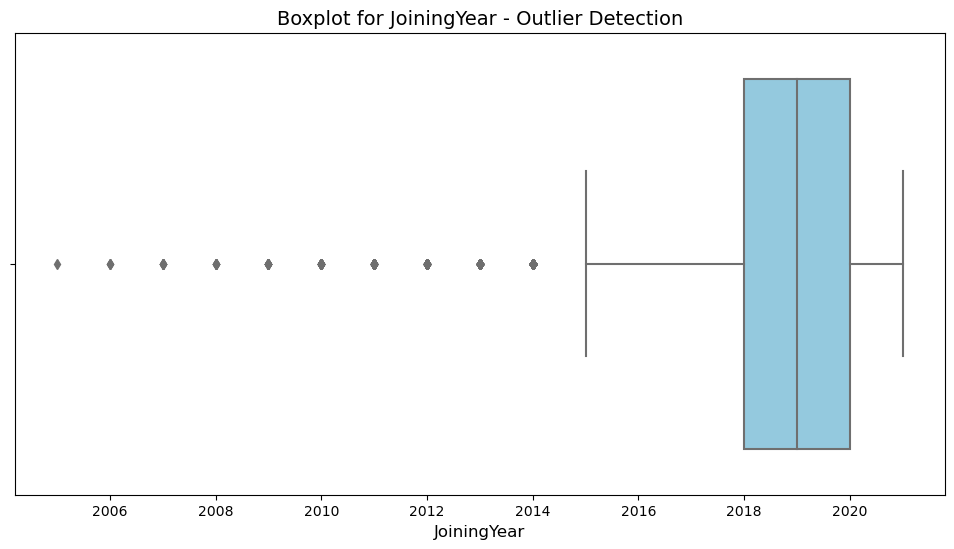

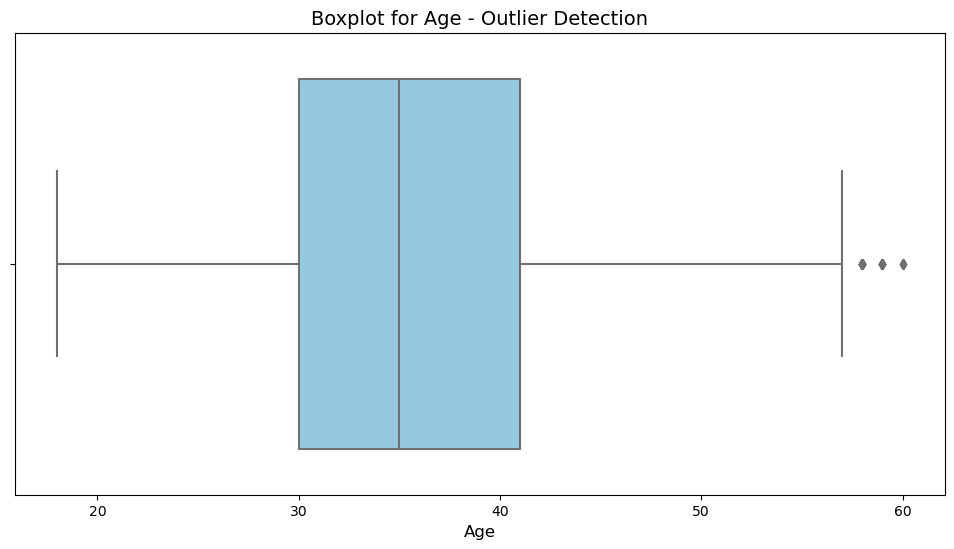

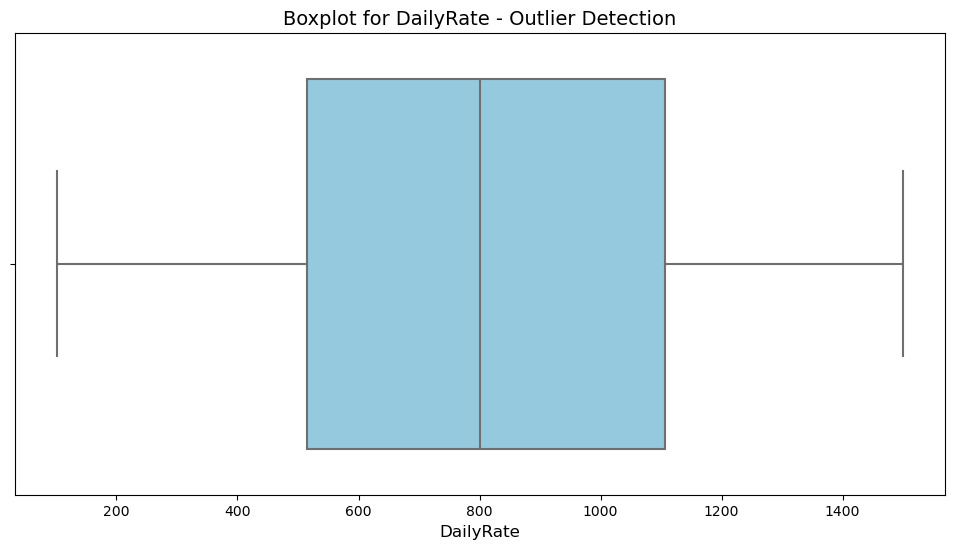

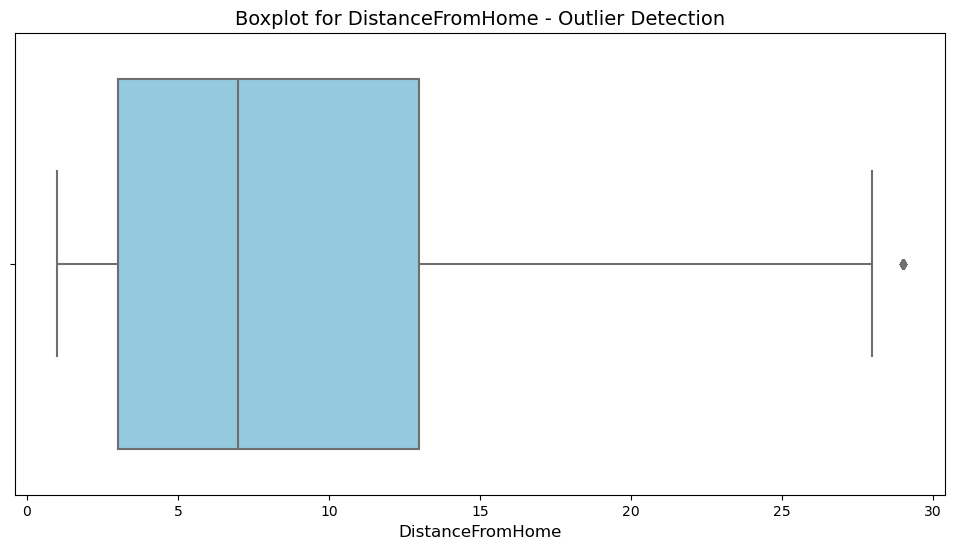

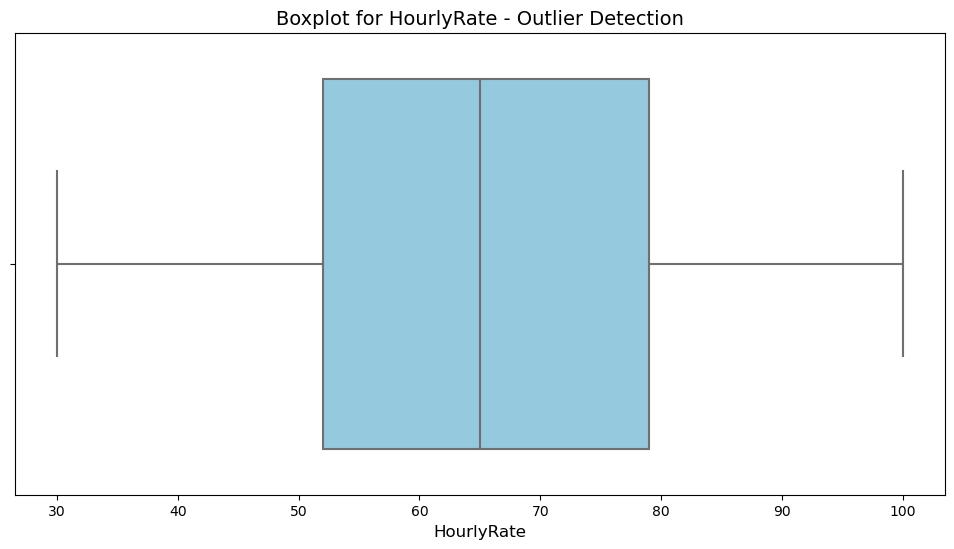

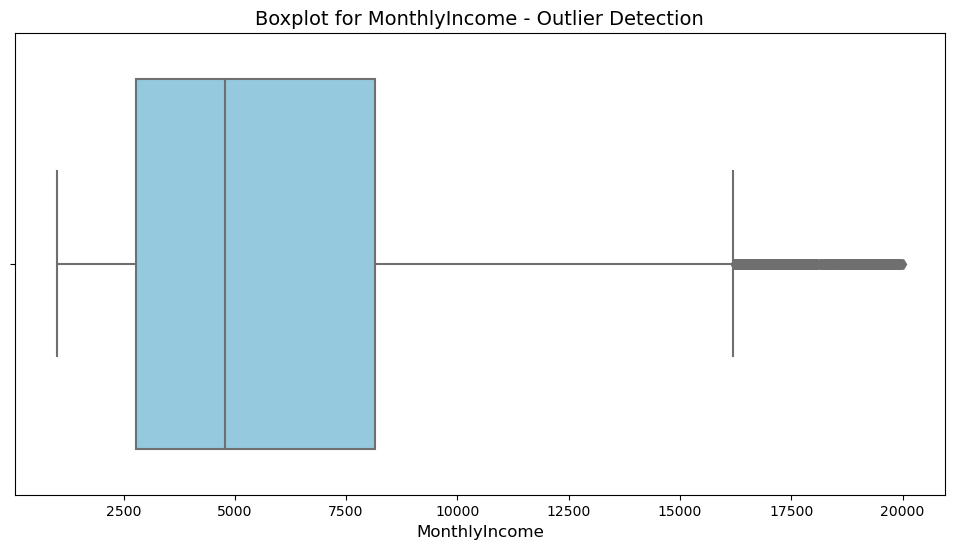

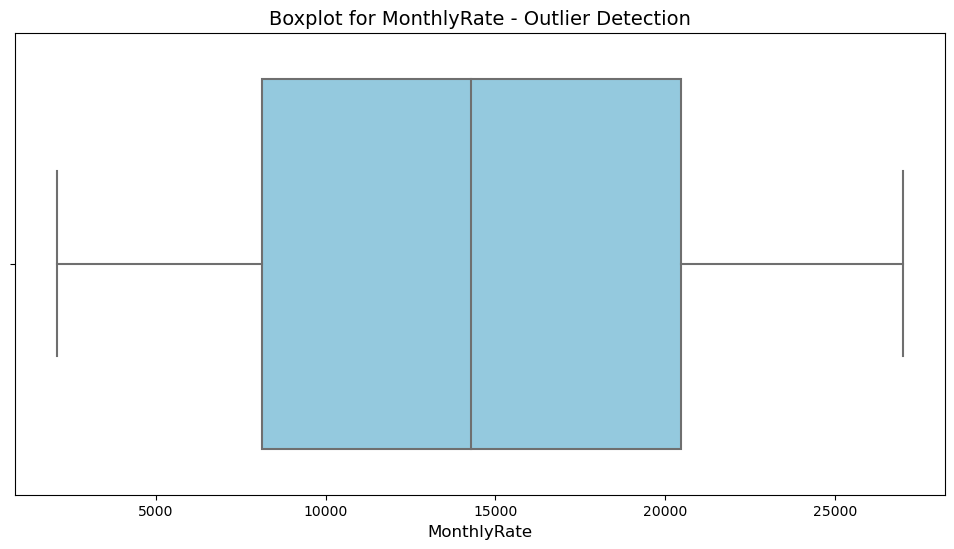

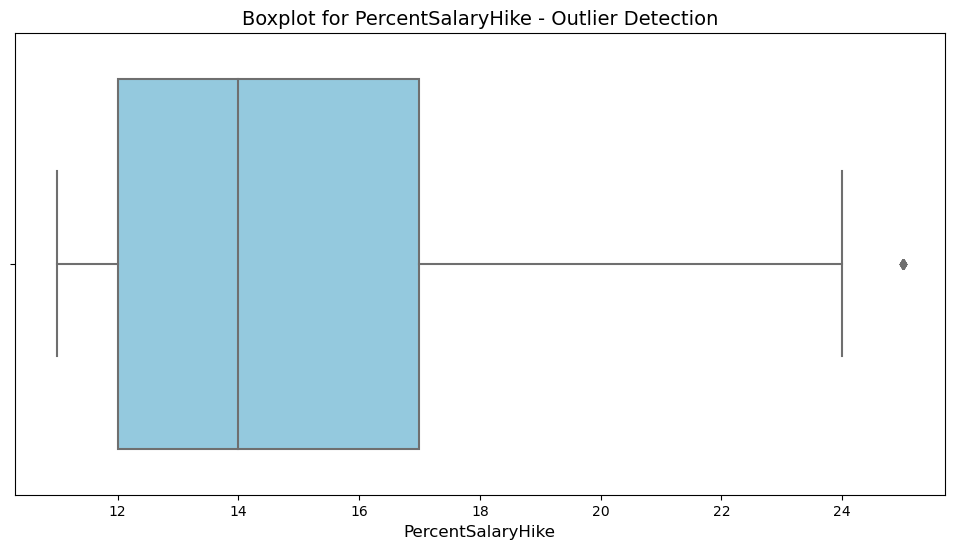

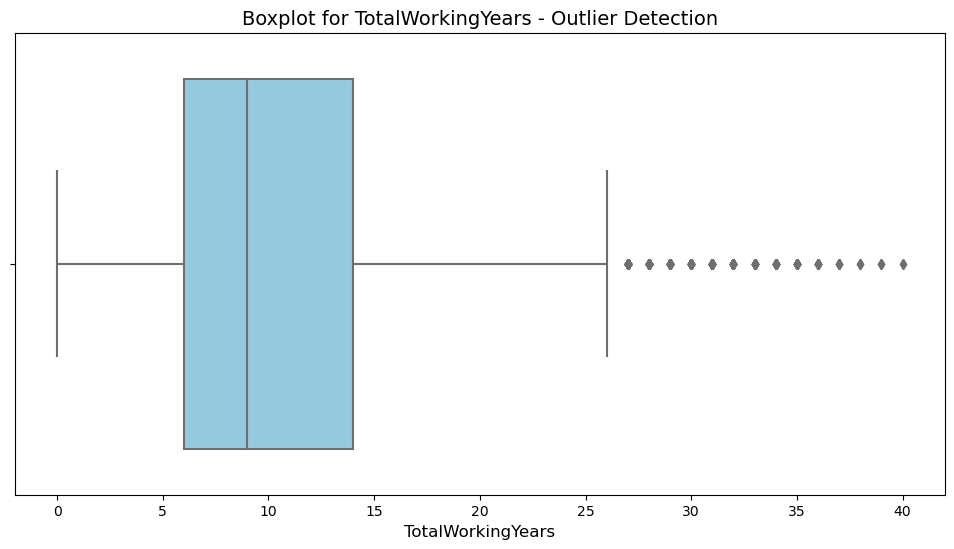

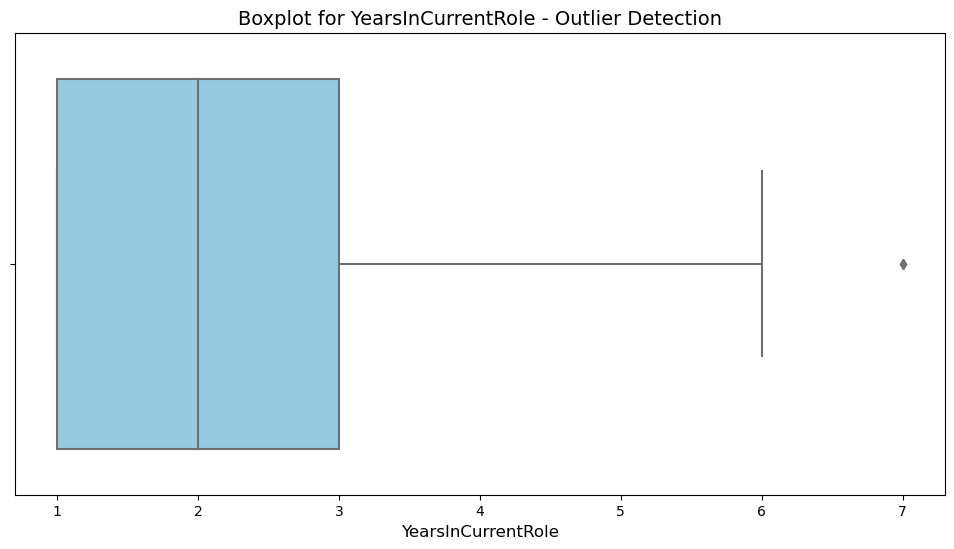

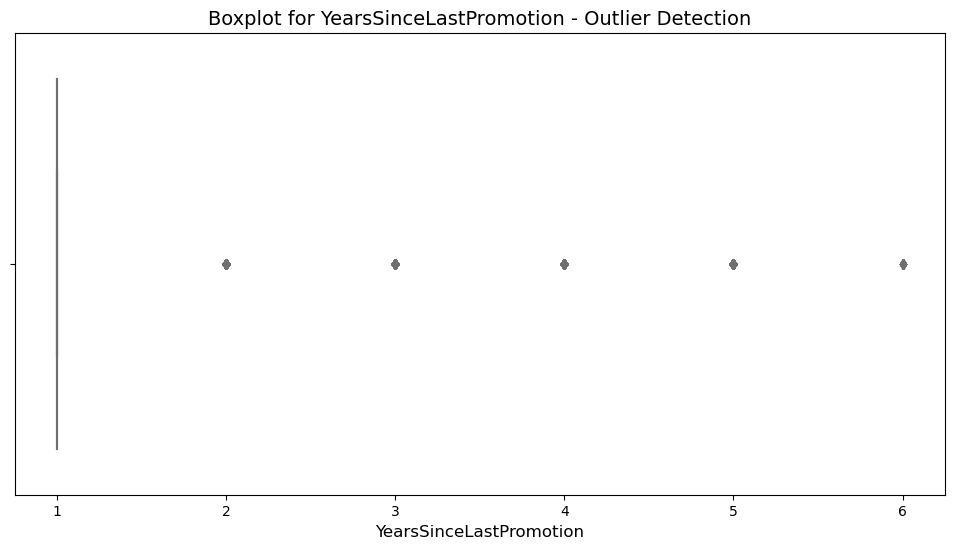

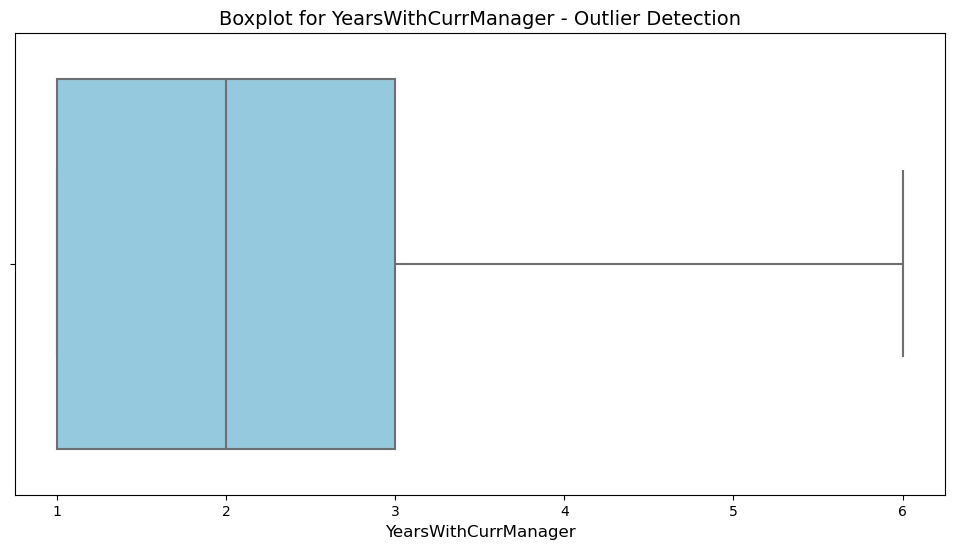

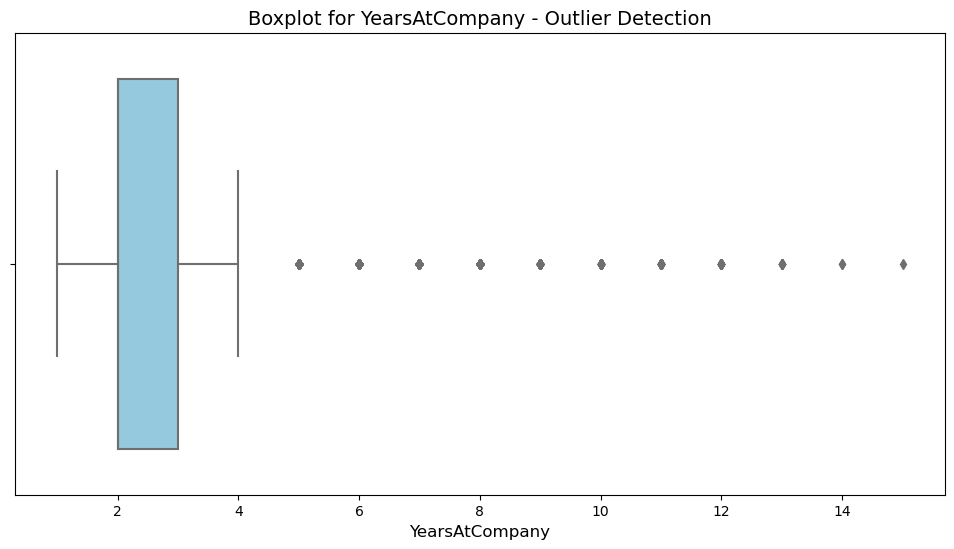

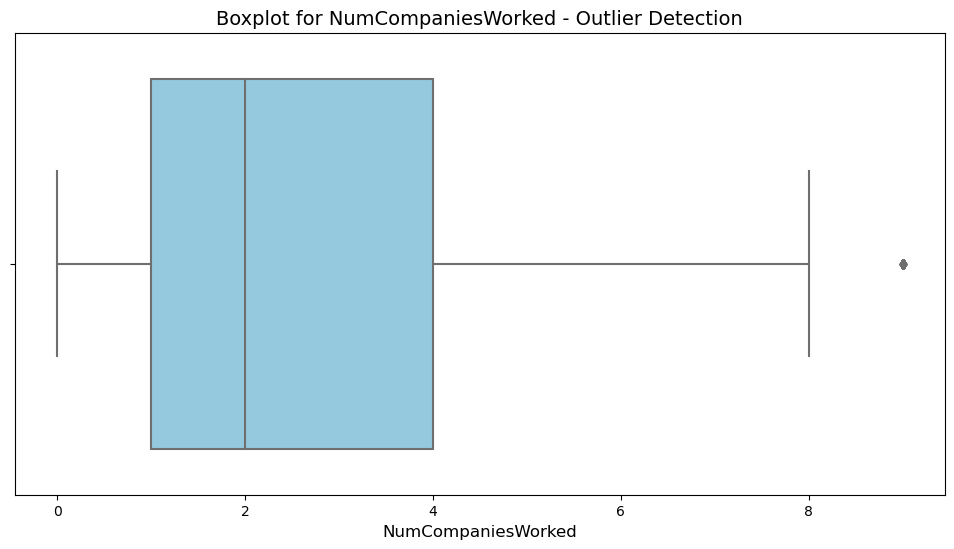

In [24]:
dataa = numerical_variables
for d in dataa:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[d], color="skyblue")
    plt.title(f"Boxplot for {d} - Outlier Detection", fontsize=14)
    plt.xlabel(d, fontsize=12)
    plt.show()


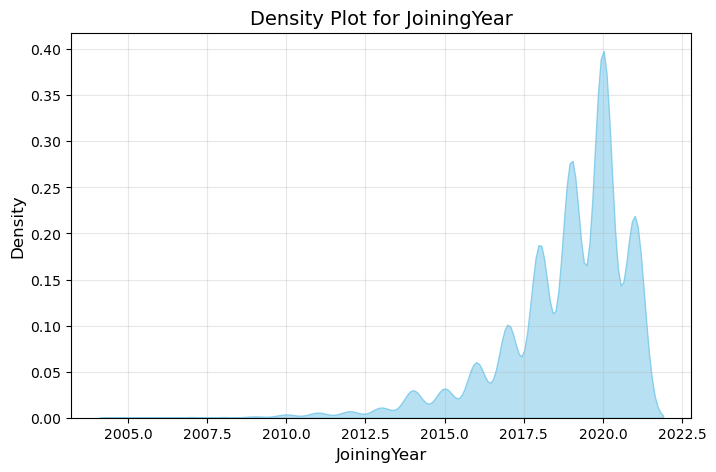

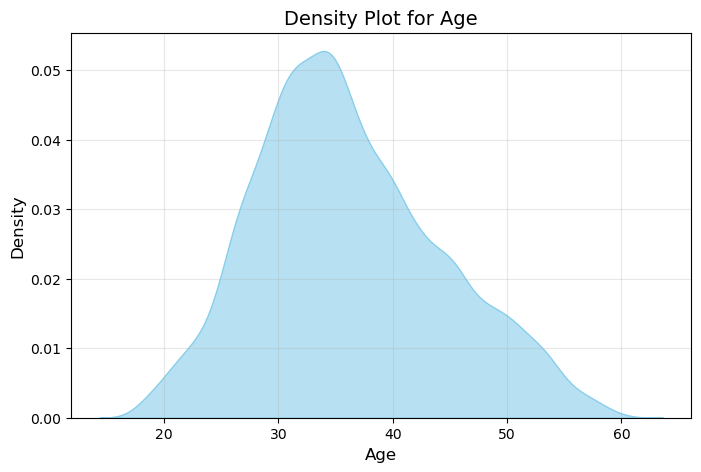

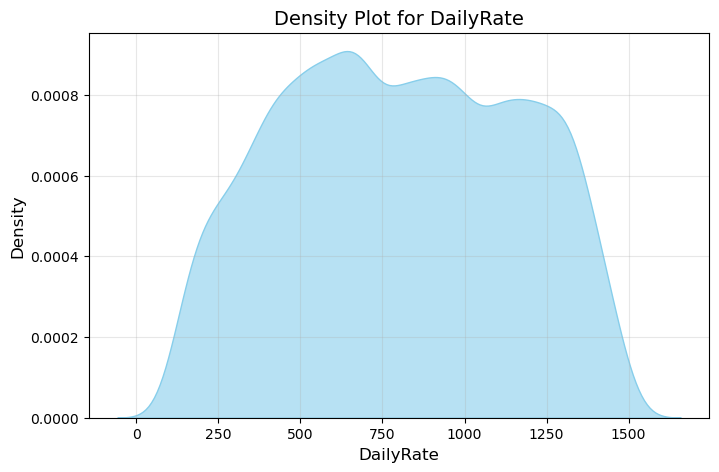

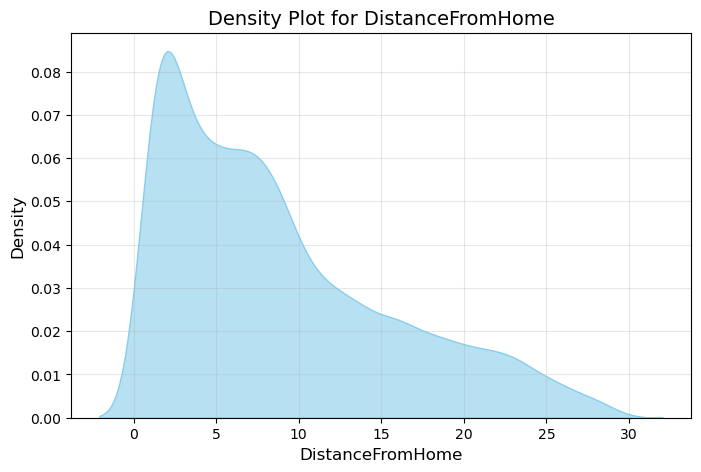

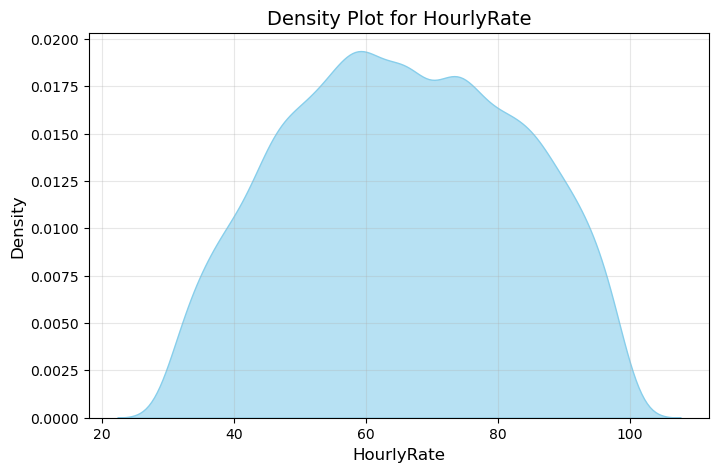

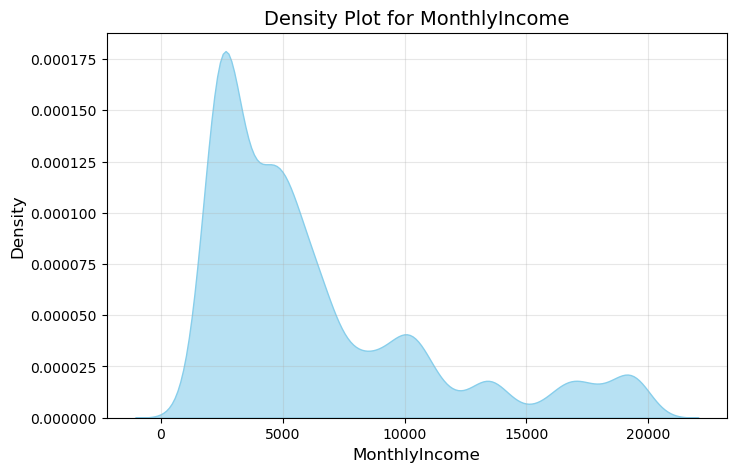

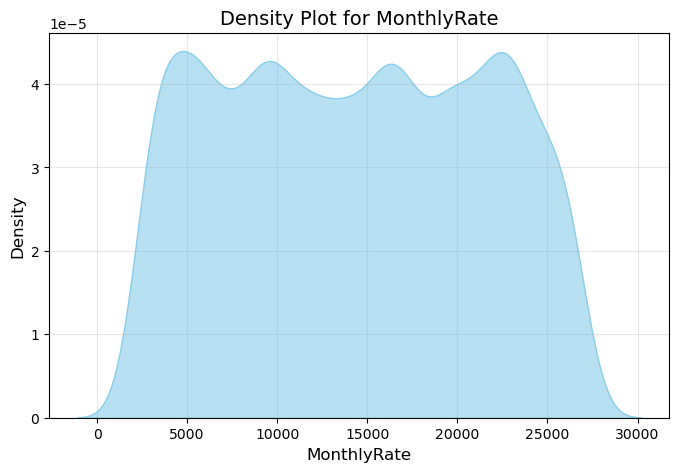

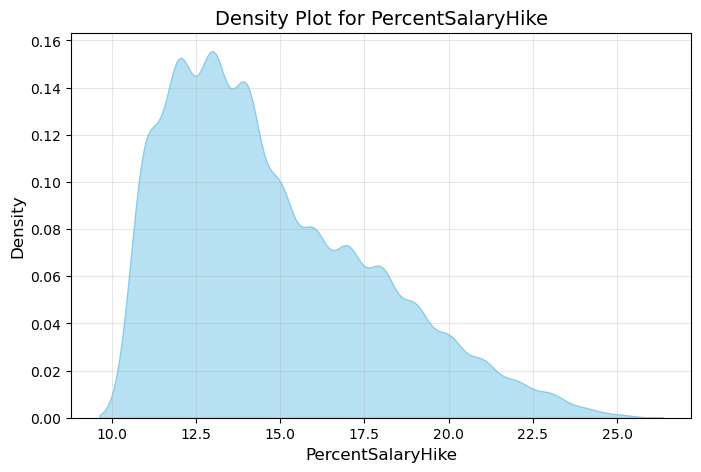

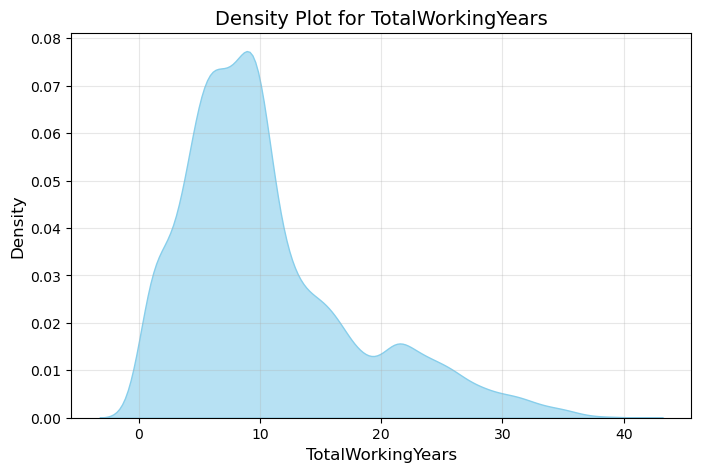

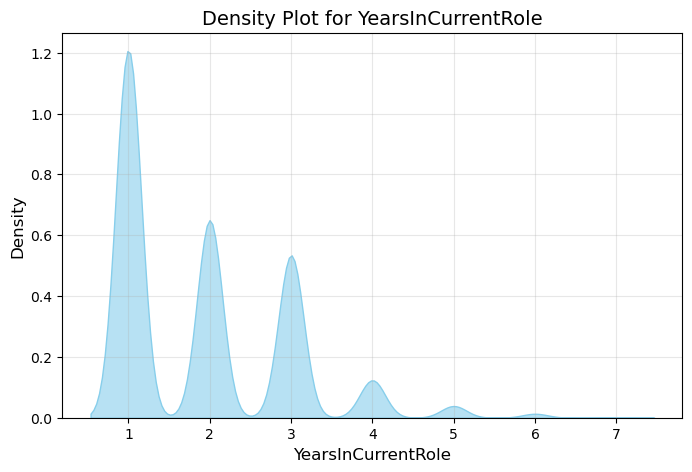

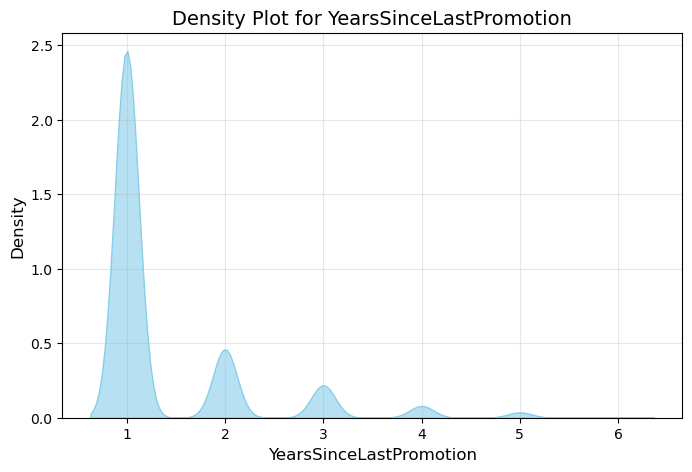

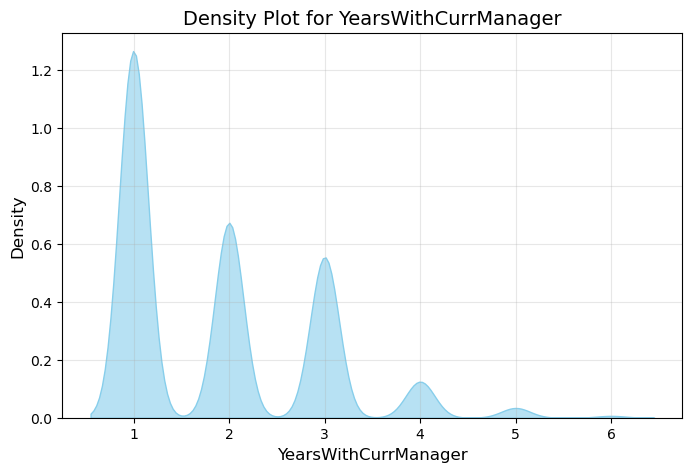

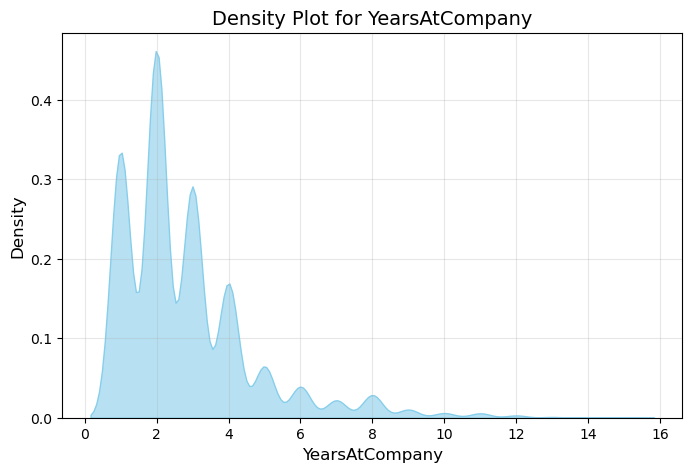

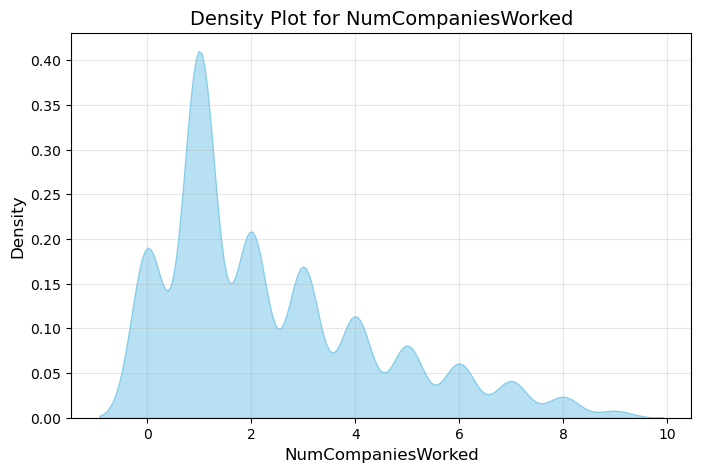

In [25]:
for var in numerical_variables:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df[var], fill=True, color='skyblue', alpha=0.6)
    plt.title(f"Density Plot for {var}", fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

### Class to Outlier

In [26]:
class ODR:
    def __init__(self,dataset,variable):
        self.dataset = dataset
        self.variable = variable
        
    def detection(self):
        for i in self.variable:
            max_th = self.dataset[i].quantile(0.98)
            min_th = self.dataset[i].quantile(0.02)
            self.dataset = self.dataset[(self.dataset[i] > min_th) & 
                              (self.dataset[i] < max_th)]
            
        return self.dataset 

In [27]:
outlier_remover = ODR(df, numerical_variables)

cleaned_dataset = outlier_remover.detection()

In [28]:
cleaned_dataset.head()

,JoiningYear,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,office_code,JobLevel_updated
381,2014,44,1,661,0,7,0,2,0,60,...,10,2,2,4,3,2,3,0,1,3
406,2014,32,1,475,0,2,0,3,0,66,...,9,2,2,4,3,2,3,0,7,1
462,2014,31,1,464,5,23,1,3,0,86,...,10,3,2,4,2,2,3,0,1,2
511,2014,41,1,789,4,6,3,3,0,47,...,13,4,3,5,3,2,3,0,5,3
542,2014,31,1,667,0,13,1,2,0,41,...,9,2,1,4,2,2,3,0,7,1


In [29]:
df.shape

(13423, 31)

In [30]:
cleaned_dataset.shape

(500, 31)

### Pipiline

In [32]:
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion, Pipeline
from missforest import MissForest
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [33]:
from sklearn.preprocessing import OneHotEncoder
numeric_processor=Pipeline(
    steps=[("imputation_mean",SimpleImputer(missing_values=np.nan,strategy="mean")),
          ("scaler",StandardScaler())]

)


categorical_processor = Pipeline(
    steps=[
        ("imputation_consatnt",SimpleImputer(fill_value="missing",strategy="most_frequent")),
        ('onehot', OneHotEncoder(handle_unknown='ignore',drop='first')) 
    ]
)

In [34]:
preprocessor=ColumnTransformer(
    [("categorical",categorical_processor,dummyvar),
    ("numerical",numeric_processor,numerical_variables)]
)

In [35]:
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('imputation_consatnt',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['BusinessTravel', 'Department',
                                  'EducationField', 'EnvironmentSatisfaction',
                                  'Gender', 'JobInvolvement', 'JobSatisfaction',
                                  'MaritalStatus', 'Ov...
                                  'JobLevel_updated']),
                                ('numerical',
                                 Pipeline(steps=[('imputation_mean',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['JoiningYear', 'Age', 'DailyRate',
                                  'DistanceFromHome', 'HourlyRate',
                                  'MonthlyIncome', 'MonthlyRate',
                                  'PercentSalaryHike', 'TotalWorkingYears',
                                  'YearsInCurrentRole',
                                  'YearsSinceLastPromotion',
                                  'YearsWithCurrManager', 'YearsAtCompany',
                                  'NumCompaniesWorked'])])

### ML Model 

In [36]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [37]:
from sklearn.neighbors import KNeighborsClassifier
# basse
svm = SVC(kernel='linear')  
knn = KNeighborsClassifier(n_neighbors=5) 
random_forest = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth= None) 
#metalrnr
meta_learner = LogisticRegression(penalty="l2", C=0.01, solver="newton-cg")


stacking_model = StackingClassifier(
    estimators=[
        ('svm', svm),
        ('knn', knn),
        ('rf', random_forest),
    ],
    final_estimator=meta_learner
)

# FInal Pipiline and Output

In [38]:
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),      
    ('stacking_model', stacking_model)   
])


In [39]:
final_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_consatnt',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField',
                                                   'EnvironmentSatisfaction',
                                                   'Gender', 'JobInvolvement',
                                                   'JobS...
                                                   'PercentSalaryHike',
                                                   'TotalWorkingYears',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager',
                                                   'YearsAtCompany',
                                                   'NumCompaniesWorked'])])),
                ('stacking_model',
                 StackingClassifier(estimators=[('svm', SVC(kernel='linear')),
                                                ('knn', KNeighborsClassifier()),
                                                ('rf',
                                                 RandomForestClassifier())],
                                    final_estimator=LogisticRegression(C=0.01,
                                                                       solver='newton-cg')))])

In [40]:
X = cleaned_dataset.drop("Attrition",axis=1)
y = cleaned_dataset["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
df = cleaned_dataset

In [42]:
numerical_variables = ["JoiningYear", "Age", "DailyRate", "DistanceFromHome", "HourlyRate", 
                       "MonthlyIncome", "MonthlyRate", "PercentSalaryHike", "TotalWorkingYears"
                       ]

categorical_variables = ["BusinessTravel", "Department", "EducationField", "EnvironmentSatisfaction", 
                         "Gender", "JobInvolvement", "JobSatisfaction", "MaritalStatus", 
                         "NumCompaniesWorked",  "OverTime", "PerformanceRating", 
                         "RelationshipSatisfaction","StockOptionLevel", 
                         "TrainingTimesLastYear", "WorkLifeBalance", "YearsInCurrentRole", 
                         "YearsSinceLastPromotion", "YearsWithCurrManager", "Attrition" , "office_code", 
                         "JobLevel_updated", "YearsAtCompany"]

dummyvar =  ["BusinessTravel", "Department", "EducationField", "EnvironmentSatisfaction", 
                         "Gender", "JobInvolvement", "JobSatisfaction", "MaritalStatus", 
                         "NumCompaniesWorked",  "OverTime", "PerformanceRating", 
                         "RelationshipSatisfaction","StockOptionLevel", 
                         "TrainingTimesLastYear", "WorkLifeBalance", "YearsInCurrentRole", 
                         "YearsSinceLastPromotion", "YearsWithCurrManager", "office_code", 
                         "JobLevel_updated", "YearsAtCompany"]

In [43]:
for col in numerical_variables:
        if col in df.columns:
            df[col] = df[col].astype('float64')
        else:
            print(f"Column {col} not found in the DataFrame.")

In [44]:
for col in dummyvar:
        if col in df.columns:
            df[col] = df[col].astype('object')
        else:
            print(f"Column {col} not found in the DataFrame.")

In [45]:
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_consatnt',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField',
                                                   'EnvironmentSatisfaction',
                                                   'Gender', 'JobInvolvement',
                                                   'JobS...
                                                   'PercentSalaryHike',
                                                   'TotalWorkingYears',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager',
                                                   'YearsAtCompany',
                                                   'NumCompaniesWorked'])])),
                ('stacking_model',
                 StackingClassifier(estimators=[('svm', SVC(kernel='linear')),
                                                ('knn', KNeighborsClassifier()),
                                                ('rf',
                                                 RandomForestClassifier())],
                                    final_estimator=LogisticRegression(C=0.01,
                                                                       solver='newton-cg')))])

In [46]:
train_accuracy = final_pipeline.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")


test_accuracy = final_pipeline.score(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.96
Testing Accuracy: 0.95


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [47]:
import pickle

with open('model.pkl', 'wb') as model_file:
    pickle.dump(final_pipeline, model_file)